
##    TP_CNN: détection de covid19


 ## étape 1: Explorez l’ensemble de données

In [ ]:
Notre dossier éntrainez contient 2 dossiers représentant chacun une classe différente. La ˙
plage du dossier va de 0 a 1. Avec l’aide du module OS, nous parcourons toutes les classes et
ajoutons des images et leurs étiquettes respectives dans la liste des données et des étiquettes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import pandas as pd
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [ ]:
train_generate = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

validation_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_generate.flow_from_directory(
    r'C:\Users\FSZMLH1998\Videos\covidDataset\Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = ('binary'))


Found 224 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
val_data = validation_dataset.flow_from_directory(
    r'C:\Users\FSZMLH1998\Videos\covidDataset\Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
val_data.class_indices

{'.ipynb_checkpoints': 0, 'covid': 1, 'normal': 2}

## étape 2: créer un modéle CNN

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

## étape 3: Former et valider le modéle

In [ ]:
history=model.fit_generator(train_data, steps_per_epoch=8, epochs= 25, validation_steps=2, validation_data=val_data)

Epoch 1/25
8/8 [==============================] - 101s 13s/step - loss: 1.0895 - accuracy: 0.5156 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/25
8/8 [==============================] - 120s 15s/step - loss: 0.6845 - accuracy: 0.5781 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/25
8/8 [==============================] - 108s 13s/step - loss: 0.6681 - accuracy: 0.5625 - val_loss: 0.6832 - val_accuracy: 0.6667
Epoch 4/25
8/8 [==============================] - 95s 12s/step - loss: 0.5728 - accuracy: 0.7148 - val_loss: 0.5876 - val_accuracy: 0.9667
Epoch 5/25
8/8 [==============================] - 114s 14s/step - loss: 0.3719 - accuracy: 0.8359 - val_loss: 0.4831 - val_accuracy: 0.9667
Epoch 6/25
8/8 [==============================] - 89s 11s/step - loss: 0.2835 - accuracy: 0.8711 - val_loss: 0.2697 - val_accuracy: 0.9833
Epoch 7/25
8/8 [==============================] - 88s 11s/step - loss: 0.4422 - accuracy: 0.8125 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 8/25
8/8 [=======

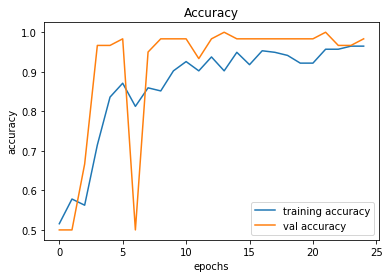

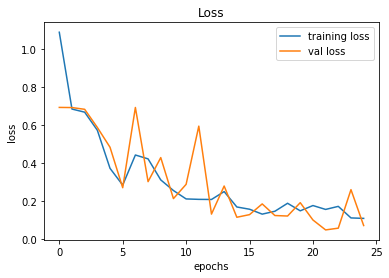

In [ ]:
 #plotting graphs for accuracy
plt.figure(0) 
plt.plot(history.history['accuracy'], label='training accuracy') 
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy') 
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss') 
plt.title('Loss') 
plt.xlabel('epochs') 
plt.ylabel('loss') 
plt.legend() 
plt.show()  

## Test de classification sur les images

Covid


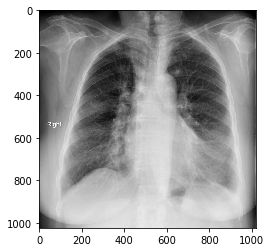

In [ ]:
import cv2
Category = ["Covid","Normal"]
def prepare(filepath):
    IMG_SIZE=224
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE,IMG_SIZE),3)
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
prediction=model.predict([prepare("f.jpeg")])#f.jpeg est une image covid
print(Category[int(prediction[0][0])])
img=cv2.imread("f.jpeg")
plt.imshow(img)
plt.show()


Covid


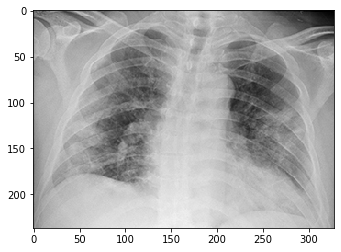

In [ ]:
import cv2
Category = ["Covid","Normal"]
def prepare(filepath):
    IMG_SIZE=224
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE,IMG_SIZE),3)
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
prediction=model.predict([prepare("22.jpg")])#f.jpeg est une image covid
print(Category[int(prediction[0][0])])
img=cv2.imread("22.jpg")
plt.imshow(img)
plt.show()

Normal


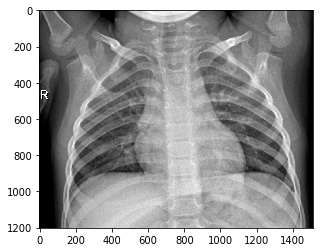

In [ ]:
import cv2
Category = ["Covid","Normal"]
def prepare(filepath):
    IMG_SIZE=224
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE,IMG_SIZE),3)
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
prediction=model.predict([prepare("n1.jpeg")])#f.jpeg est une image covid
print(Category[int(prediction[0][0])])
img=cv2.imread("n1.jpeg")
plt.imshow(img)
plt.show()

Normal


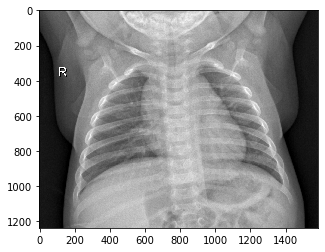

In [ ]:
import cv2
Category = ["Covid","Normal"]
def prepare(filepath):
    IMG_SIZE=224
    img_array=cv2.imread(filepath)
    new_array=cv2.resize(img_array, (IMG_SIZE,IMG_SIZE),3)
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
prediction=model.predict([prepare("24.jpeg")])#f.jpeg est une image covid
print(Category[int(prediction[0][0])])
img=cv2.imread("24.jpeg")
plt.imshow(img)
plt.show()

In [ ]:
model.save('modelCovid.h5')   

#                                                        FIN 
#                                                    @ ELMOUKHTAR Abdelmalek